<a href="https://colab.research.google.com/github/paulohenrique1303/Data-cleaning-and-processing/blob/main/Data_cleaning_and_processing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sea
import statistics as sts

Análise e tratamento da coluna Aparencia

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/todos os arquivos/13.Prática em Python/dados/tempo.csv', sep= ';')
dados.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [ ]:
dados['Aparencia'].value_counts()

sol        5
chuva      5
nublado    3
menos      1
Name: Aparencia, dtype: int64

In [ ]:
dados.loc[dados['Aparencia'] == 'menos'] = 'sol'
dados['Aparencia'].value_counts()

sol        6
chuva      5
nublado    3
Name: Aparencia, dtype: int64

Analise e tratamento da coluna Temperatura

In [ ]:
dados['Temperatura'].value_counts()

75      2
85      1
80      1
83      1
70      1
68      1
65      1
sol     1
1220    1
69      1
72      1
81      1
71      1
Name: Temperatura, dtype: int64

In [ ]:
dados.loc[dados['Temperatura'] == 'sol']

,Aparencia,Temperatura,Umidade,Vento,Jogar
6,sol,sol,sol,sol,sol


In [ ]:
dados.drop(6, axis=0, inplace = True)
dados['Temperatura'].value_counts()

75      2
85      1
80      1
83      1
70      1
68      1
65      1
1220    1
69      1
72      1
81      1
71      1
Name: Temperatura, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


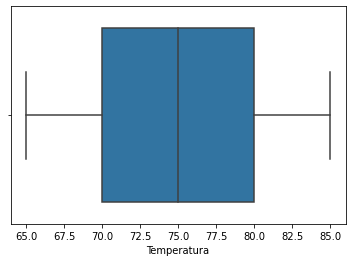

In [ ]:
mediana_temperatura = sts.median(dados['Temperatura'])
dados.loc[(dados['Temperatura'] < -130 )| (dados['Temperatura'] > 130), 'Temperatura'] = mediana_temperatura
sea.boxplot(dados['Temperatura'])

In [ ]:
mediana_temperatura

75

Analise e tratamento da coluna Umidade

In [ ]:
dados['Umidade'].value_counts()

70.0     3
90.0     2
85.0     1
86.0     1
80.0     1
95.0     1
200.0    1
75.0     1
91.0     1
Name: Umidade, dtype: int64

In [ ]:
dados.loc[(dados['Umidade'] < 0) | (dados['Umidade'] > 100)]
mediana_umidade = sts.median(dados['Umidade'])
dados.loc[(dados['Umidade'] < 0) | (dados['Umidade'] > 100)] = mediana_umidade

In [ ]:
dados.loc[(dados['Umidade'] < 0) | (dados['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


Analise e tratamento da coluna Vento

In [ ]:
dados['Vento'].value_counts()

FALSO         7
VERDADEIRO    5
86.0          1
Name: Vento, dtype: int64

In [ ]:
dados.loc[dados['Vento'] == 86.0]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,86.0,86.0,86.0,86.0,86.0


In [ ]:
dados.loc[dados['Vento'] == 86.0] = 'FALSO'
dados.loc[dados['Vento'] == 86.0]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
dados['Jogar'].value_counts()

sim      7
nao      5
FALSO    1
Name: Jogar, dtype: int64

In [ ]:
dados.loc[dados['Jogar'] == 'FALSO'] = 'sim'
dados['Jogar'].value_counts()

sim    8
nao    5
Name: Jogar, dtype: int64

Valores Nan

In [ ]:
dados.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          0
Jogar          0
dtype: int64

In [ ]:
dados['Umidade'].fillna(mediana_umidade, inplace=True)
dados.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64